In [ ]:
!pip install wordninja

In [ ]:
!pip install Lazypredict

In [ ]:
!pip install contractions

In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install lazypredict

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

#import requests as rq
import numpy as np
import re

#!pip install wordninja
import wordninja

!pip install spacy
import spacy
spacy.cli.download("en_core_web_sm")

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#!pip install contractions
import contractions

#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import pickle


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd

text = ["You're A retardHISPANIC, all you do is drink tequilla and mow lawns you weirdo beaner!"]
data = pd.read_csv("/content/drive/MyDrive/CyberbullyingDetectionDataset.csv")

data = data.replace(to_replace='\\r', value='', regex=True)

tweet = pd.DataFrame(text, columns=['tweets_text'])
tweet = tweet.replace(to_replace='\\r', value='', regex=True)
tweet['tweets_text'] = tweet['tweets_text'].str.lower()

tweet.head()  # Display the preprocessed tweet DataFrame


,tweets_text
0,"you're a retardhispanic, all you do is drink t..."


In [ ]:
classifyData = pd.read_csv("/content/drive/MyDrive/CyberbullyingTypeDataset.csv")
classifyData = classifyData.replace(to_replace='\\r', value='', regex=True)

<Axes: xlabel='Cyberbullying'>

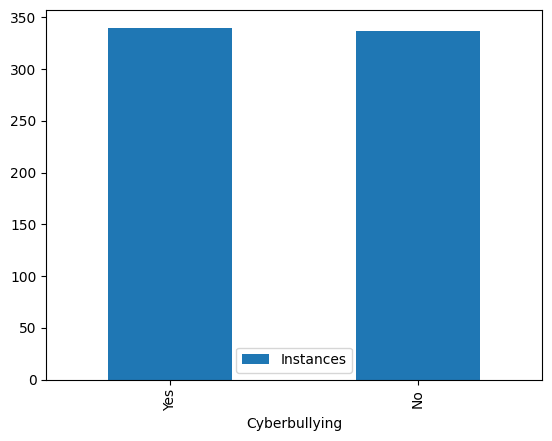

In [ ]:
cyberbullyingYes=0
cyberbullyingNo=0
for type in data['type']:
  if (type == 'notcyberbullying'):
    cyberbullyingNo += 1
  else:
    cyberbullyingYes += 1
dataPlot = pd.DataFrame({'Cyberbullying': ['Yes', 'No'], 'Instances': [cyberbullyingYes, cyberbullyingNo]})
dataPlot.plot(kind='bar', x='Cyberbullying', y='Instances')

<Axes: xlabel='Cyberbullying Type'>

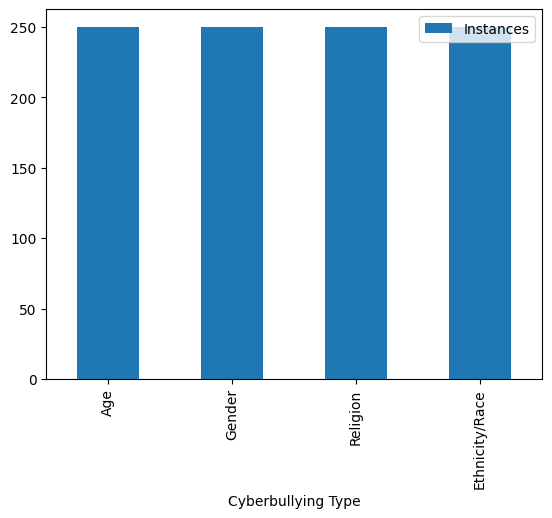

In [ ]:
age = 0
ethnicity = 0
gender = 0
religion = 0

for type in classifyData['type']:
    if type == 'age':
        age += 1
    elif type == 'ethnicityandrace':
        ethnicity += 1
    elif type == 'gender':
        gender += 1
    elif type == 'religion':
        religion += 1

classifyDataPlot = pd.DataFrame({
    'Cyberbullying Type': ['Age', 'Gender', 'Religion', 'Ethnicity/Race'],
    'Instances': [age, gender, religion, ethnicity]
})
classifyDataPlot.plot(kind='bar', x='Cyberbullying Type', y='Instances')


In [ ]:
#This function will convert a list to a string
def string(data):
  string = ' '
  return (string.join(data))

In [ ]:
#Lowercasing all the tweets in the dataframe
data['tweets_text'] = data['tweets_text'].str.lower()
classifyData[ 'tweets_text'] = classifyData[ 'tweets_text'].str.lower()
tweet['tweets_text'] = tweet['tweets_text'].str.lower ()
tweet.head()

,tweets_text
0,"you're a retardhispanic, all you do is drink t..."


In [ ]:
#Regular expressions are used to clean data Like @usernames, Links, retweet (RT), digits, any special characters
temp=''
for index, row in enumerate(data['tweets_text']):
  temp = re.sub(r'(\brt)|(http\S+)|(\d+)|(&(gt;)+)|(&(lt;)+)|(&(amp;)+)|([^\w\s])', '', str(row))
  temp = re.sub('(\'| )|(\"| )|(_)', ' ', temp)
  data['tweets_text'][index] = temp
temp=''
for index, row in enumerate(classifyData['tweets_text']):
  temp = re.sub(r'(\brt)|(http\S+)|(\d+)|(&(gt;)+)|(&(lt;)+)|(&(amp;)+)|([^\w\s])', '', str(row))
  temp = re.sub('(\'| )|(\"| )|(_)', ' ', temp)
  classifyData['tweets_text'][index] = temp
temp=''
for index, row in enumerate(tweet['tweets_text']):
  temp = re.sub(r'(\brt)|(http\S+)|(\d+)|(&(gt;)+)|(&(lt;)+)|(&(amp;)+)|([^\w\s])', '', str(row))
  temp = re.sub('(\'| )|(\"| )|(_)', ' ', temp)
  tweet['tweets_text'][index] = temp
tweet.head()

,tweets_text
0,youre a retardhispanic all you do is drink teq...


In [ ]:
#To expand contractions in the tweet
for index, row in enumerate(data['tweets_text']):
            temp = []
            for word in row.split():
                temp.append(contractions.fix(word))
            data['tweets_text'][index] = string(temp)
for index, row in enumerate(classifyData['tweets_text']):
            temp = []
            for word in row.split():
                temp.append(contractions.fix(word))
            classifyData['tweets_text'][index] = string(temp)
for index, row in enumerate(tweet['tweets_text']):
            temp = []
            for word in row.split():
                temp.append(contractions.fix(word))
            tweet['tweets_text'][index] = string(temp)
tweet.head()

,tweets_text
0,you are a retardhispanic all you do is drink t...


In [ ]:
#To expand slang words in tweet
slangWords = pd.read_csv("/content/drive/MyDrive/Slang.csv")
slangWords = slangWords.replace(to_replace='\\r', value='', regex=True)
slangWords.head(10)

,slang,word
0,af,as fuck
1,afk,away from keyboard
2,aka,as known as
3,asap,as soon as possible
4,atm,at the moment
5,bff,best friend forever
6,brb,be right back
7,btw,by the way
8,cba,can not be asked
9,cuz,because


In [ ]:
#To expand slang word in tweets
for num, row in enumerate(data['tweets_text']):
            temp = []
            for word in row.split():
                found = 0
                if (len(word)<6 and len(word)>2):
                    for index, slang in enumerate(slangWords['slang']):
                        if (slang == word):
                            temp.append(slangWords['word'][index])
                            found = 1
                if (found != 1):
                    temp.append(word)
            data['tweets_text'][num] =string(temp)
for num, row in enumerate(classifyData['tweets_text']):
            temp = []
            for word in row.split():
                found = 0
                if (len(word)<6 and len(word)>2):
                    for index, slang in enumerate(slangWords['slang']):
                        if (slang == word):
                            temp.append(slangWords['word'][index])
                            found = 1
                if (found != 1):
                    temp.append(word)
            classifyData['tweets_text'][num] = string(temp)
for num, row in enumerate(tweet['tweets_text']):
            temp = []
            for word in row.split():
                found = 0
                if (len(word)<6 and len(word)>2):
                    for index, slang in enumerate(slangWords['slang']):
                        if (slang == word):
                            temp.append(slangWords['word'][index])
                            found = 1
                if (found != 1):
                    temp.append(word)
            tweet['tweets_text'][num] = string(temp)
tweet.head()

,tweets_text
0,you are a retardhispanic all you do is drink t...


In [ ]:
#To seperate 2 words which are combined together
for index, row in enumerate(data['tweets_text']):
            temp = []
            for word in row.split():
                if (len(word)>8):
                    unmunched = wordninja.split(word)
                    temp.append(string(unmunched))
                else:
                    temp.append(word)
            data['tweets_text'][index] = string(temp)
for index, row in enumerate(classifyData['tweets_text']):
            temp = []
            for word in row.split():
                if (len(word)>8):
                    unmunched = wordninja.split(word)
                    temp.append(string(unmunched))
                else:
                    temp.append(word)
            classifyData['tweets_text'][index] = string(temp)
for index, row in enumerate(tweet['tweets_text']):
            temp = []
            for word in row.split():
                if (len(word)>8):
                    unmunched = wordninja.split(word)
                    temp.append(string(unmunched))
                else:
                    temp.append(word)
            tweet['tweets_text'][index] = string(temp)
tweet.head()

,tweets_text
0,you are a retard hispanic all you do is drink ...


In [ ]:
tokens = []

for row in data['tweets_text']:
    tokens.append(word_tokenize(row))

data['tokens'] = tokens
tokens = []
for row in classifyData['tweets_text']:
  tokens.append(word_tokenize(row))
classifyData['tokens'] = tokens
tokens = []
for row in tweet['tweets_text']:
  tokens.append(word_tokenize(row))
tweet['tokens'] = tokens

tweet.head()

,tweets_text,tokens
0,you are a retard hispanic all you do is drink ...,"[you, are, a, retard, hispanic, all, you, do, ..."


In [ ]:
offenseWords = pd.read_csv("/content/drive/MyDrive/OffensiveWithSeverity.csv")
offenseWords = offenseWords.replace(to_replace= '\\r', value= '', regex=True)

In [ ]:
negationWords = pd.read_csv("/content/drive/MyDrive/Negation.txt")
negationWords = negationWords.replace(to_replace= '\\r', value= '', regex=True)
negationWords.head()

,words
0,no
1,neither
2,nor
3,not
4,none


In [ ]:
#To detect the offensive words and severity of those words
def process_tweet(row):
    words, temp1, temp2 = 0, [], []
    for index1, token in enumerate(row):
        words += 1
        for index2, offensive in enumerate(offenseWords['words']):
            if (token == offensive):
                negation = 0
                for neg in negationWords['words']:
                    if (index1 < 1):
                        break
                    if (row[index1 - 1] == neg or row[index1 - 2] == neg):
                        negation = 1
                        break
                if (negation != 1):
                    temp1.append(token)
                    temp2.append(offenseWords['severity'][index2])
    return pd.Series([words, temp1, temp2])

# Apply the custom function to each row and assign the results to new columns
new_columns = data['tokens'].apply(process_tweet)
data[['total words', 'offensive words', 'severity words']] = new_columns

new_columns = tweet['tokens'].apply(process_tweet)
tweet[['total words', 'offensive words', 'severity words']] = new_columns

tweet.head()

,tweets_text,tokens,total words,offensive words,severity words
0,you are a retard hispanic all you do is drink ...,"[you, are, a, retard, hispanic, all, you, do, ...",17,"[retard, weirdo, beaner]","[3, 3, 5]"


In [ ]:
#To calculate density of offensive word in the tweets
density = []
for total, offensive in zip(data['total words'], data['offensive words']):
  density.append(len(offensive) / total)
data['density'] = density

density = []
for total, offensive in zip(tweet['total words'], tweet['offensive words']):
  density.append(len(offensive) / total)
tweet['density'] = density

tweet.head()

,tweets_text,tokens,total words,offensive words,severity words,density
0,you are a retard hispanic all you do is drink ...,"[you, are, a, retard, hispanic, all, you, do, ...",17,"[retard, weirdo, beaner]","[3, 3, 5]",0.18


In [ ]:
#To calculate the sentiment value of the tweet
compound = []
for row in data['tweets_text']:
  polarity = SentimentIntensityAnalyzer().polarity_scores(row)
  compound.append(polarity["compound"])
data['sentiment analysis'] = compound

compound = []
for row in tweet['tweets_text']:
  polarity = SentimentIntensityAnalyzer().polarity_scores(row)
  compound.append(polarity["compound"])
tweet['sentiment analysis'] = compound

tweet.head()

,tweets_text,tokens,total words,offensive words,severity words,density,sentiment analysis
0,you are a retard hispanic all you do is drink ...,"[you, are, a, retard, hispanic, all, you, do, ...",17,"[retard, weirdo, beaner]","[3, 3, 5]",0.18,-0.74


In [ ]:
#To calculate the severity of the tweet by dividing the sum of severity with the number of words in the tweet
severity, weights=[],[1, 2, 3, 4, 5]
for severe in data['severity words']:
    count, product=[0]*5, []
    for num in severe:
        if (num==1):
            count[0] +=1
        elif (num==2):
            count[1]+= 1
        elif (num==3):
            count[2]+=1
        elif (num==4):
            count[3]+= 1
        elif (num ==5):
            count[4]+=1
    for num, num2 in zip(count, weights):
        product.append(num*num2)
    totalProduct=sum(product)
    totalCount=sum(count)
    if (totalCount==0):
        severity.append(0)
    else:
        severity.append(totalProduct/totalCount)
data['severity']=severity

severity, weights=[],[1, 2, 3, 4, 5]
for severe in tweet['severity words']:
    count, product=[0]*5, []
    for num in severe:
        if (num==1):
            count[0] +=1
        elif (num==2):
            count[1]+= 1
        elif (num==3):
            count[2]+=1
        elif (num==4):
            count[3]+= 1
        elif (num ==5):
            count[4]+=1
    for num, num2 in zip(count, weights):
        product.append(num*num2)
    totalProduct=sum(product)
    totalCount=sum(count)
    if (totalCount==0):
        severity.append(0)
    else:
        severity.append(totalProduct/totalCount)
tweet['severity']=severity
tweet.head()

,tweets_text,tokens,total words,offensive words,severity words,density,sentiment analysis,severity
0,you are a retard hispanic all you do is drink ...,"[you, are, a, retard, hispanic, all, you, do, ...",17,"[retard, weirdo, beaner]","[3, 3, 5]",0.18,-0.74,3.67


In [ ]:
predictionDataM1=data[['density', 'severity', 'sentiment analysis']].copy()
targetM1=data['type']
tweetDataM1 = tweet[['density', 'severity', 'sentiment analysis']].copy()
tweetDataM1.head()

,density,severity,sentiment analysis
0,0.18,3.67,-0.74


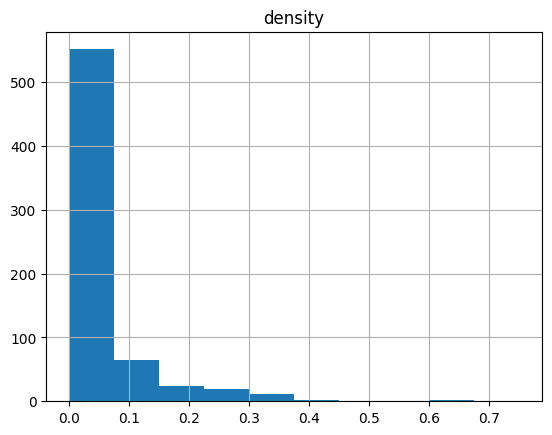

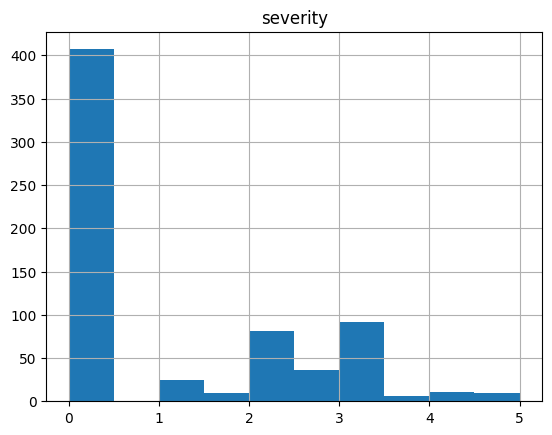

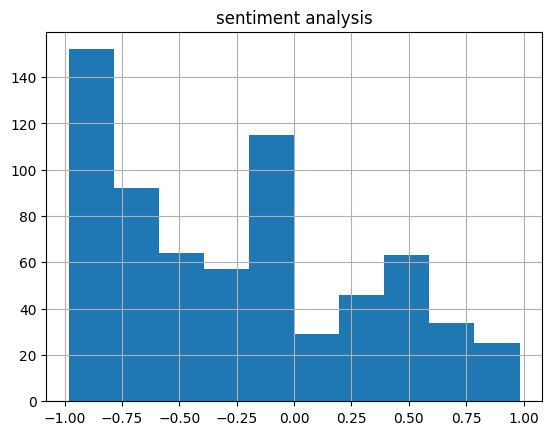

In [ ]:
for col in predictionDataM1.columns:
    predictionDataM1.hist (column = col)


Best Results for SVC:
Highest Accuracy: 0.8529411764705882 at Random State: 66
Highest F1 Score: 0.8360655737704917 at Random State: 66

Confusion Matrix:
 [[51 17]
 [ 3 65]]
                          Predicted Not Cyberbullying  Predicted Cyberbullying
Actual Not Cyberbullying                           51                       17
Actual Cyberbullying                                3                       65


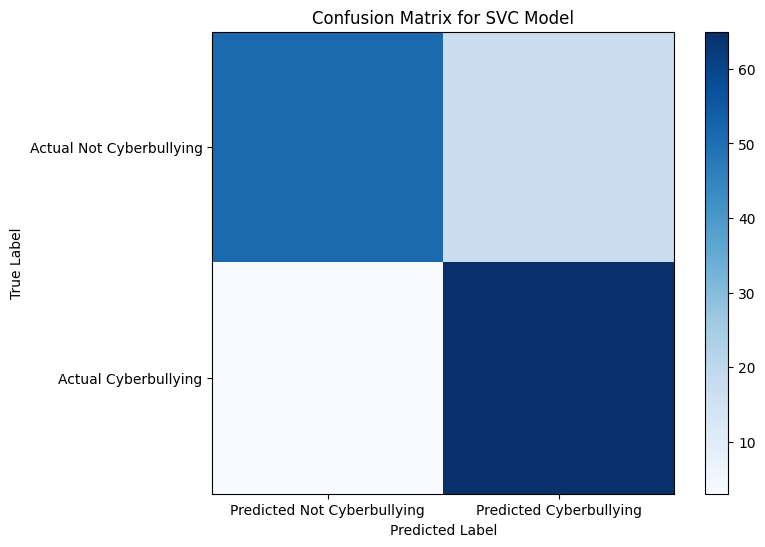

In [ ]:

import pandas as pd  # Import pandas for confusion matrix visualization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Define the range of random states to try
random_states = range(1, 101)

# Initialize variables to store the best results for the SVC model
best_accuracy = 0
best_f1_score = 0
best_random_state = None

for random_state in random_states:
   trainData, testData, trainTarget, testTarget = train_test_split(predictionDataM1, targetM1, test_size=0.20, random_state=random_state, stratify=targetM1)

   # Create an SVC model
   model = SVC()

   # Train the model
   model.fit(trainData, trainTarget)

   # Make predictions on the test set
   target = model.predict(testData)

   # Calculate accuracy and F1 score
   accuracy = accuracy_score(testTarget, target)
   f1 = f1_score(testTarget, target, pos_label='cyberbullying')

   # Check if this random state achieved better results
   if accuracy > best_accuracy:
       best_accuracy = accuracy
       best_f1_score = f1
       best_random_state = random_state

       # Create the confusion matrix
       cm = confusion_matrix(testTarget, target)

# Print the best results and confusion matrix
print(f"\nBest Results for SVC:")
print(f"Highest Accuracy: {best_accuracy} at Random State: {best_random_state}")
print(f"Highest F1 Score: {best_f1_score} at Random State: {best_random_state}")
print("\nConfusion Matrix:\n", cm)

# Visualize the confusion matrix (optional)
df_cm = pd.DataFrame(cm, index=["Actual Not Cyberbullying", "Actual Cyberbullying"], columns=["Predicted Not Cyberbullying", "Predicted Cyberbullying"])
print(df_cm.to_string())  # Or use heatmap visualization libraries for a more visual representation
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.imshow(cm, cmap=plt.cm.Blues)  # Use a colormap like 'Blues' for better visualization
plt.colorbar()  # Add a colorbar to show the scale of values
plt.xticks(ticks=[0, 1], labels=["Predicted Not Cyberbullying", "Predicted Cyberbullying"])
plt.yticks(ticks=[0, 1], labels=["Actual Not Cyberbullying", "Actual Cyberbullying"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVC Model")
plt.show()


In [ ]:
model = GaussianNB()
model.fit(trainData, trainTarget)
#Saving our model results in a file
pickle.dump (model, open("cyberbullyingdetection.sav", 'wb'))

In [ ]:
model = pickle.load(open("cyberbullyingdetection.sav", 'rb'))

In [ ]:
cyberTarget=model.predict(tweetDataM1)
if string(cyberTarget) == 'cyberbullying':
    tweet['cyberbullying'] = 1
else:
    tweet['cyberbullying'] = 0
tweet.head()

,tweets_text,tokens,total words,offensive words,severity words,density,sentiment analysis,severity,cyberbullying
0,you are a retard hispanic all you do is drink ...,"[you, are, a, retard, hispanic, all, you, do, ...",17,"[retard, weirdo, beaner]","[3, 3, 5]",0.18,-0.74,3.67,1


In [ ]:
ethnicityAndRaceGlossary=pd.read_csv("/content/drive/MyDrive/EthnicityAndRaceGlossary.txt")
ethnicityAndRaceGlossary = ethnicityAndRaceGlossary.replace(to_replace= '\\r', value='', regex=True)
ethnicityAndRaceGlossary.head ()

,words
0,afghan
1,afghanistan
2,africa
3,african
4,afro


In [ ]:
ageGlossary=pd.read_csv("/content/drive/MyDrive/AgeGlossary.txt")
ageGlossary = ageGlossary.replace(to_replace= '\\r', value='', regex=True)
ageGlossary.head ()

,words
0,ass
1,asshat
2,asshole
3,austism
4,autistic


In [ ]:
religionGlossary=pd.read_csv("/content/drive/MyDrive/ReligionGlossary.txt")
religionGlossary = religionGlossary.replace(to_replace= '\\r', value='', regex=True)
religionGlossary.head ()

,words
0,ablution
1,abraham
2,adam
3,adhan
4,adultery


In [ ]:
genderGlossary=pd.read_csv("/content/drive/MyDrive/GenderGlossary.txt")
genderGlossary = genderGlossary.replace(to_replace= '\\r', value='', regex=True)
genderGlossary.head ()

,words
0,abrosexual
1,agender
2,allosexual
3,androgyne
4,androgynous


In [ ]:
isEthnicityRace=[]
for row in classifyData['tokens']:
    temp=0
    for token in row:
        for glossary in ethnicityAndRaceGlossary['words']:
            if (token == glossary):
                temp += 1
                break
    isEthnicityRace.append(temp)
classifyData['ethnicity and race']=isEthnicityRace

isAge=[]
for row in classifyData['tokens']:
    temp=0
    for token in row:
        for glossary in ageGlossary['words']:
            if (token == glossary):
                temp += 1
                break
    isAge.append(temp)
classifyData['age']=isAge

isReligion=[]
for row in classifyData['tokens']:
    temp=0
    for token in row:
        for glossary in religionGlossary['words']:
            if (token == glossary):
                temp += 1
                break
    isReligion.append(temp)
classifyData['religion']=isReligion

isGender=[]
for row in classifyData['tokens']:
    temp=0
    for token in row:
        for glossary in genderGlossary['words']:
            if (token == glossary):
                temp += 1
                break
    isGender.append(temp)
classifyData['gender']=isGender

classifyData.head()

,tweets_text,type,tokens,ethnicity and race,age,religion,gender
0,del en as dictator paul makes gay rape jokes a...,gender,"[del, en, as, dictator, paul, makes, gay, rape...",0,0,0,2
1,arabs and muslims do not supporting you do not...,religion,"[arabs, and, muslims, do, not, supporting, you...",0,1,1,0
2,is not this a trope in like every teen movie e...,gender,"[is, not, this, a, trope, in, like, every, tee...",0,2,0,3
3,dumb goth fuck you nigger blocked,ethnicityandrace,"[dumb, goth, fuck, you, nigger, blocked]",1,1,0,0
4,nigga i am laying down tryna sleep get to bed ...,ethnicityandrace,"[nigga, i, am, laying, down, tryna, sleep, get...",3,2,1,1


In [ ]:
isEthnicityRace=[]
for row in tweet['tokens']:
  temp=0
  for token in row:
    for glossary in ethnicityAndRaceGlossary['words']:
      if (token == glossary):
        temp += 1
        break
  isEthnicityRace.append(temp)
tweet['ethnicity and race']=isEthnicityRace

isAge=[]
for row in tweet['tokens']:
  temp=0
  for token in row:
    for glossary in ageGlossary['words']:
      if (token == glossary):
        temp += 1
        break
  isAge.append(temp)
tweet['age']=isAge

isReligion=[]
for row in tweet['tokens']:
  temp=0
  for token in row:
    for glossary in religionGlossary['words']:
      if (token == glossary):
        temp += 1
        break
  isReligion.append(temp)
tweet['religion']=isReligion

isGender=[]
for row in tweet['tokens']:
  temp=0
  for token in row:
    for glossary in genderGlossary['words']:
      if (token == glossary):
        temp += 1
        break
  isGender.append(temp)
tweet['gender']=isGender


tweet.head()

,tweets_text,tokens,total words,offensive words,severity words,density,sentiment analysis,severity,cyberbullying,ethnicity and race,age,religion,gender
0,you are a retard hispanic all you do is drink ...,"[you, are, a, retard, hispanic, all, you, do, ...",17,"[retard, weirdo, beaner]","[3, 3, 5]",0.18,-0.74,3.67,1,2,1,0,0


In [ ]:
predictionDataM2 = classifyData[['age', 'gender', 'religion', 'ethnicity and race']].copy()
targetM2= classifyData['type']
tweetDataM2 = tweet[['age', 'gender', 'religion', 'ethnicity and race']].copy()
trainData, testData, trainTarget, testTarget = train_test_split(predictionDataM2, targetM2, test_size=0.20, random_state=46,stratify=targetM2)



In [ ]:
for col in predictionDataM2.columns:
  predictionDataM2.hist(column = col)

SVC:	Accuracy: 0.7941176470588235	F1 Score: 0.7929984779299848
Confusion Matrix for SVC:
[[49 19]
 [ 9 59]]


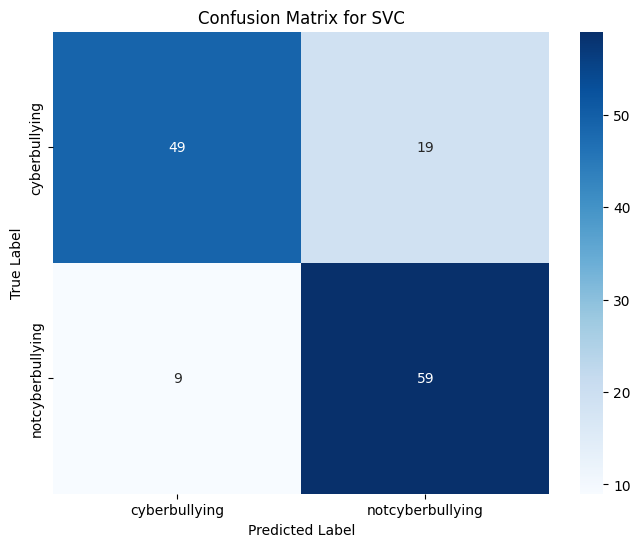

Logistic Regression:	Accuracy: 0.7941176470588235	F1 Score: 0.7925021795989537
Random Forest Classifier:	Accuracy: 0.7941176470588235	F1 Score: 0.7937161430119176
KNN:	Accuracy: 0.7573529411764706	F1 Score: 0.7572348136528373
Naive Bayes:	Accuracy: 0.7867647058823529	F1 Score: 0.7841387991899732
Extra Trees Classifier:	Accuracy: 0.7352941176470589	F1 Score: 0.734375


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize your trainData, testData, trainTarget, and testTarget before using this code

# Define a list of models to evaluate
models = [
    ("SVC", SVC()),
    ("Logistic Regression", LogisticRegression(random_state=0)),
    ("Random Forest Classifier", RandomForestClassifier(max_depth=2, random_state=0)),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Naive Bayes", GaussianNB()),
    ("Extra Trees Classifier", ExtraTreesClassifier(n_estimators=100, random_state=0))
]

# Loop over models
for model_name, model in models:
    model.fit(trainData, trainTarget)
    target = model.predict(testData)
    accuracy = accuracy_score(testTarget, target)
    f1 = f1_score(testTarget, target, average='macro')

    # Print accuracy and F1 score
    print(f"{model_name}:\tAccuracy: {accuracy}\tF1 Score: {f1}")

    # Generate confusion matrix
    confusion_mat = confusion_matrix(testTarget, target)

    # Print and visualize confusion matrix for SVC
    if model_name == "SVC":
        print(f"Confusion Matrix for {model_name}:\n{confusion_mat}")

        # Visualize confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f"Confusion Matrix for {model_name}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()


In [ ]:
model = SVC()
model.fit(trainData,trainTarget)
pickle.dump (model, open("cyberbullyingtype.sav", 'wb'))
model = pickle.load(open("cyberbullyingtype.sav", 'rb'))
classifyTarget = model.predict(tweetDataM2)
print("Type",classifyTarget)

Type ['ethnicityandrace']
